# b) Regression

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import graphviz 
import pydotplus
import seaborn as sb
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

path = './DataSet/'
filename = 'Admission_Predict_Ver1.1_small_data_set_for_Linear_Regression.csv'

filename_read = os.path.join(path,filename)
df = pd.read_csv(filename_read,na_values=['NA','?'])

def normalize_numeric_minmax(df, name):
        df[name] = ((df[name] - df[name].min()) / (df[name].max() - df[name].min())).astype(np.float32)

# visualize the relationship
sb.pairplot(df, x_vars='CGPA', y_vars='Chance of Admit ', height=4, aspect=2, kind='reg')

Root mean squared error = 0.1045
R-squared = 0.7873


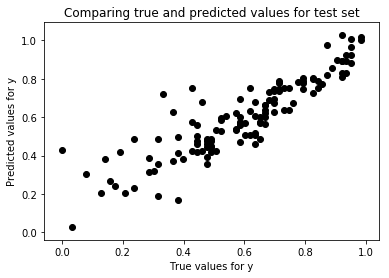

In [2]:
# Linear Regression
normalize_numeric_minmax(df, 'CGPA')
normalize_numeric_minmax(df, 'Chance of Admit ')
X = df[['CGPA']]
y = df[['Chance of Admit ']]
x_train, x_test, y_train, y_test = train_test_split(X,y,random_state=1)
regr = LinearRegression()
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)

plt.scatter(y_test, y_pred, color='black')
plt.title('Comparing true and predicted values for test set')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')

print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared = %.4f' % r2_score(y_test, y_pred))

# b) Classification

In [3]:
# first we discretize the last column "Chance of Admit" into three classes
filename_read = os.path.join(path,filename)
df = pd.read_csv(filename_read,na_values=['NA','?'])

df = df.reindex(np.random.permutation(df.index))
df.reset_index(inplace=True, drop=True)

df.loc[(df['Chance of Admit '] > 0) & (df['Chance of Admit '] <= 0.33), 'Chance of Admit '] = -1
df.loc[(df['Chance of Admit '] > 0.33) & (df['Chance of Admit '] <= 0.66), 'Chance of Admit '] = -2
df.loc[(df['Chance of Admit '] > 0.66) & (df['Chance of Admit '] <= 1), 'Chance of Admit '] = -3
df['Chance of Admit '] = df['Chance of Admit '].replace([-1],'low')
df['Chance of Admit '] = df['Chance of Admit '].replace([-2],'mid')
df['Chance of Admit '] = df['Chance of Admit '].replace([-3],'high')
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,299,330,114,3,4.5,4.5,9.24,1,high
1,489,322,112,3,3.0,4.0,8.62,1,high
2,36,320,110,5,5.0,5.0,9.20,1,high
3,302,319,108,2,2.5,3.0,8.76,0,mid
4,227,306,110,2,3.5,4.0,8.45,0,mid
5,428,310,101,3,3.5,5.0,8.65,1,high
6,361,322,110,3,4.0,5.0,8.64,1,high
7,411,301,96,1,3.0,4.0,7.56,0,mid
8,38,300,105,1,1.0,2.0,7.80,0,mid
9,156,312,109,3,3.0,3.0,8.69,0,high


In [4]:
# split the data
numInstances = 500
numTrain = 100
numTest = numInstances - numTrain

trainingData = df[:numTest]
testData = df[numTest:]

# train with training data
Y = pd.DataFrame(trainingData, columns=['Chance of Admit '])
X = trainingData.drop(['Chance of Admit ', 'Serial No.'] ,axis=1)

clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)
clf = clf.fit(X, Y)

X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,330,114,3,4.5,4.5,9.24,1
1,322,112,3,3.0,4.0,8.62,1
2,320,110,5,5.0,5.0,9.20,1
3,319,108,2,2.5,3.0,8.76,0
4,306,110,2,3.5,4.0,8.45,0
5,310,101,3,3.5,5.0,8.65,1
6,322,110,3,4.0,5.0,8.64,1
7,301,96,1,3.0,4.0,7.56,0
8,300,105,1,1.0,2.0,7.80,0
9,312,109,3,3.0,3.0,8.69,0


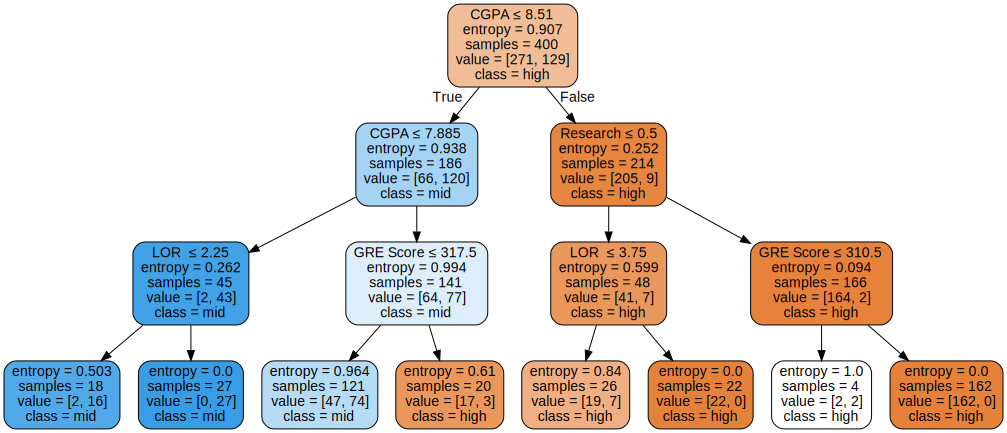

In [12]:
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=X.columns,  
                      class_names=['high','mid','low'],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)
graph

In [64]:
testY = pd.DataFrame(testData, columns=['Chance of Admit '])
testX = testData.drop(['Serial No.','Chance of Admit '],axis=1)

predY = clf.predict(testX)
testData.reset_index(inplace=True, drop=True)
predictions = pd.concat([testData['Chance of Admit '],pd.Series(predY,name='Predicted Class')], axis=1)
print('Accuracy on test data is %.2f' % (accuracy_score(testY, predY)))
predictions

Accuracy on test data is 0.73


,Chance of Admit,Predicted Class
0,high,high
1,mid,high
2,mid,mid
3,mid,high
4,high,high
5,mid,mid
6,high,high
7,high,high
8,high,high
9,mid,high
